<a href="https://colab.research.google.com/github/llw522/IMLO-Coursework/blob/Collab_Uploads/IMLO_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

#Normalise Data

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 256

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_load = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_load = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck')

100%|██████████| 170M/170M [00:02<00:00, 80.3MB/s]


#Check Data Integrity

In [3]:
def imshow(image):
  image = image / 2 + 0.5
  npImage = image.numpy()
  plt.imshow(np.transpose(npImage, (1, 2, 0)))
  plt.show()

In [4]:
iterData = iter(train_load)
images, labels = next(iterData)

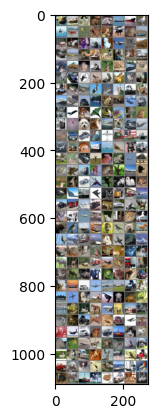

tensor([6, 9, 3, 5, 5, 8, 8, 2, 8, 8, 2, 6, 3, 7, 3, 1, 4, 7, 2, 8, 5, 0, 5, 4,
        1, 0, 7, 3, 2, 3, 3, 0, 0, 9, 5, 9, 2, 4, 9, 4, 5, 1, 2, 2, 9, 7, 2, 9,
        1, 6, 9, 7, 8, 7, 9, 5, 8, 2, 1, 8, 6, 7, 1, 8, 3, 0, 5, 0, 2, 8, 2, 2,
        3, 2, 5, 3, 8, 5, 8, 0, 4, 1, 1, 2, 0, 9, 5, 8, 0, 3, 6, 9, 0, 0, 5, 9,
        0, 4, 1, 4, 3, 6, 0, 0, 6, 6, 8, 5, 6, 4, 0, 3, 4, 4, 1, 0, 2, 3, 5, 6,
        2, 0, 9, 0, 3, 9, 1, 0, 9, 9, 8, 3, 6, 1, 0, 7, 3, 9, 0, 4, 5, 5, 3, 7,
        4, 2, 8, 8, 2, 2, 5, 7, 2, 4, 9, 9, 5, 0, 8, 1, 1, 6, 3, 2, 6, 4, 1, 5,
        7, 4, 4, 9, 0, 6, 9, 5, 2, 4, 4, 5, 6, 3, 3, 1, 4, 8, 1, 0, 0, 0, 9, 2,
        0, 0, 5, 0, 0, 5, 6, 4, 8, 6, 8, 7, 0, 4, 8, 7, 2, 6, 9, 7, 4, 9, 0, 5,
        5, 0, 1, 5, 1, 8, 3, 5, 7, 4, 0, 7, 4, 4, 8, 5, 7, 3, 8, 7, 4, 7, 2, 9,
        9, 7, 5, 0, 4, 8, 9, 2, 2, 7, 8, 5, 3, 1, 3, 1])
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [5]:
imshow(torchvision.utils.make_grid(images))
print(labels)
print(classes)

#Convolutional Network

In [6]:
class My_NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.convert1 = nn.Conv2d(3, 16, 3, 1, padding=1)
    self.convert2 = nn.Conv2d(16, 32, 3, 1, padding=1)
    self.convert3 = nn.Conv2d(32, 64, 3, 1, padding=1)
    self.linear1 = nn.Linear(4*4*64, 500)
    self.dropout = nn.Dropout(0.2)
    self.linear2 = nn.Linear(500, 10)

  def forward(self, x):
      x = F.relu(self.convert1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.convert2(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.convert3(x))
      x = F.max_pool2d(x, 2, 2)

      x = x.view(-1, 4*4*64)
      x = F.relu(self.linear1(x))
      x = self.dropout(x)
      x = self.linear2(x)

      return x

In [7]:
device = torch.device('cpu')
print(device)
classifier = My_NN().to(device)

cpu


#Loss Function and Optimiser

In [8]:
lossFn = nn.CrossEntropyLoss()

optimiser = optim.SGD(classifier.parameters(), lr = 0.01, momentum=0.9)

#Neural Network Monitored Training

In [ ]:
epochs = 230
losses = []
successes = []
test_losses = []
test_successes = []
total_losses = []
total_successes = []
test_total_losses = []
test_total_successes = []


for i in range(epochs):
  losses = 0.0
  successes = 0.0
  test_losses = 0.0
  test_successes = 0.0

  for inputs, labels in train_load:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = classifier(inputs)
    loss = lossFn(outputs, labels)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    _, preds = torch.max(outputs, 1)
    losses += loss.item()
    successes += torch.sum(preds == labels.data)

  with torch.no_grad():
    for test_inputs, test_labels in test_load:
      test_inputs = test_inputs.to(device)
      test_labels = test_labels.to(device)
      test_outputs = classifier(test_inputs)
      test_loss = lossFn(test_outputs, test_labels)

      _, test_preds = torch.max(test_outputs, 1)
      test_losses += loss.item()
      test_successes += torch.sum(test_preds == test_labels.data)

  epoch_loss = losses / (len(train_load)*batch_size)
  epoch_success = successes.float() / (len(train_load)*batch_size)
  total_losses.append(epoch_loss)
  total_successes.append(epoch_success.cpu().numpy())

  test_epoch_loss = test_losses / (len(test_load)*batch_size)
  test_epoch_success = test_successes.float() / (len(test_load)*batch_size)
  test_total_losses.append(test_epoch_loss)
  test_total_successes.append(test_epoch_success.cpu().numpy())

  print('epoch:', (i+1))
  print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_success.cpu().item()))
  print('test loss: {:.4f}, acc {:.4f} '.format(test_epoch_loss, test_epoch_success.cpu().item()))

epoch: 1
training loss: 0.0083, acc 0.2206 
test loss: 0.0072, acc 0.3352 
epoch: 2
training loss: 0.0065, acc 0.3963 
test loss: 0.0060, acc 0.4281 
epoch: 3
training loss: 0.0057, acc 0.4674 
test loss: 0.0049, acc 0.4915 
epoch: 4
training loss: 0.0052, acc 0.5200 
test loss: 0.0052, acc 0.5278 
epoch: 5
training loss: 0.0048, acc 0.5583 
test loss: 0.0034, acc 0.5683 
epoch: 6
training loss: 0.0044, acc 0.5996 
test loss: 0.0037, acc 0.5979 
epoch: 7
training loss: 0.0041, acc 0.6300 
test loss: 0.0034, acc 0.5964 
epoch: 8
training loss: 0.0038, acc 0.6570 
test loss: 0.0031, acc 0.6266 
epoch: 9
training loss: 0.0035, acc 0.6792 
test loss: 0.0035, acc 0.6389 
epoch: 10
training loss: 0.0033, acc 0.7042 
test loss: 0.0029, acc 0.6617 
epoch: 11
training loss: 0.0031, acc 0.7205 
test loss: 0.0028, acc 0.6757 
epoch: 12
training loss: 0.0028, acc 0.7441 
test loss: 0.0028, acc 0.6838 
epoch: 13
training loss: 0.0026, acc 0.7590 
test loss: 0.0025, acc 0.6847 
epoch: 14
training lo

#Show Training/Test Results

In [ ]:
plt.style.use('ggplot')
plt.plot(total_losses, label='Training Loss')
plt.plot(test_total_losses, label='Test Loss')
plt.legend()

#Save Model

In [ ]:
PATH = './cifar_net.pth'
torch.save(classifier.state_dict(), PATH)

#Testing Model

In [ ]:
dataiter = iter(test_load)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Actual Labels: ', ' '.join(f'{classes[labels[i]]:5s}' for i in range(20)))

In [ ]:
classifier = My_NN()
classifier.load_state_dict(torch.load(PATH))

In [ ]:
outputs = classifier(images)

In [ ]:
outputs.shape

In [ ]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[i]]:5s}' for i in range(20)))

In [ ]:
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in test_load:
    images, labels = data
    outputs = classifier(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))